# Changing Colorspaces:
In this blog, we will learn how to convert images from one color-space to another, like BGR to RGB,BGR to Gray scale,BGR to HSV.
In addition to that, we will create an application which extracts a colored object in a video.
# Changing Color-space:
There are more than 150 color-space conversion methods available in OpenCV, but we will look into only few which are most widely used ones.BGR to Gray, BGR to RGB,BGR to HSV.
BGR : Blue,Green,Red (Opencv Default Color space)
RGB : Red,Green,Blue,(Matplotlib work with RGB for mat)
HSV: Hue ( Dominant Wavelength ),S – Saturation ( Purity / shades of the color ),V – Value ( Intensity ).

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
For BGR to Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR to HSV, we use the flag cv2.COLOR_BGR2HSV and
for BGR to RGB we use use the flags cv2.COLOR_BGR2RGB



In [1]:
import cv2
import matplotlib.pyplot as plt
## Check all availabel color flag.
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

In [2]:
## Lets make function to display play images using Matplotlib library for our convenience.

In [15]:
def displayImage(imageList):
    plt.figure(figsize=(30,15))
    i = 0
    for item in imageList:  
        plt.subplot(2, 5, i+1)
        plt.imshow(item['image'])
        i += 1
        plt.axis('off')
        plt.title(item['name'],fontsize = 18, color = 'green')
    plt.tight_layout()
    plt.show()
    

In [4]:
# Changiing color
image_BGR = cv2.imread('images/two-birds.jpg')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2HSV)

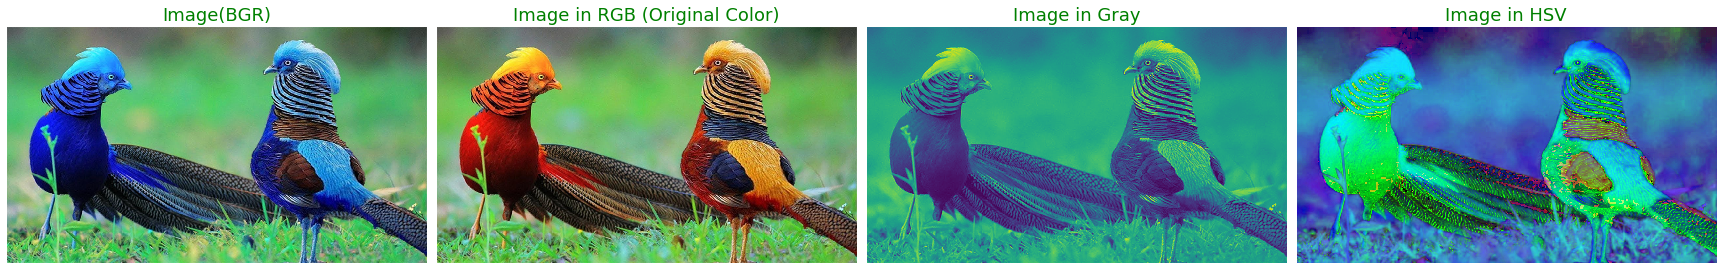

In [16]:
displayImage([
    {'name':'Image(BGR)','image':image_BGR},
    {'name':'Image in RGB (Original Color)','image':image_RGB},
    {'name':'Image in Gray','image':gray_image},
    {'name':'Image in HSV','image':hsv_image}
             ])

# Object Tracking:
Now we know how to convert BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue,Red, Green colored object. So here is the method:
Take each frame of the video.
Convert from BGR to HSV color-space:
We threshold the HSV image for a range of blue color
Now extract the blue object alone, we can do whatever on that image we want.

In [26]:
import cv2
import numpy as np

def trackColor(upperColorLimit, lowerColorLimit,colorName):
    
    cap = cv2.VideoCapture(0)
    while(1):

        # Take each frame
        _, frame = cap.read()

        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # define range of blue color in HSV
        lower_blue = np.array([110,50,50])
        upper_blue = np.array([130,255,255])

        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lowerColorLimit, upperColorLimit)

        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame, mask= mask)

        cv2.imshow('frame: ' + colorName,frame)
        cv2.imshow('mask: '+colorName,mask)
        cv2.imshow('Res: '+colorName,res)
        k = cv2.waitKey(5) & 0xFF
        if k == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



In [23]:
# There are some noises in the image. We will see how to remove them in later 

In [18]:
green = np.uint8([[[0, 0, 255]]]) # here insert the bgr color values which you want to convert to hsv
hsvGreen = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)

lowrLimit = hsvGreen[0][0][0] - 0, 50, 50 # Set lower Limit
upperLimit = hsvGreen[0][0][0] + 10, 255, 255 # upper limit
upperLimit = np.asarray(upperLimit) # convert it to array
lowrLimit = np.asarray(lowrLimit)

print("Upper Limit:{}".format(upperLimit))
print("Lower Limit:{}".format(lowrLimit))


Upper Limit:[ 10 255 255]
Lower Limit:[ 0 50 50]


In [27]:
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
trackColor(upperLimit,lowrLimit ,'Red Object Detector') # Check for Blue,ReD, Green color Detection